# Location identification

**Objective**: 

The main goal of this project predict the location of an user based on the RSSI signals from different beacons.

The RSSI was taken every 100 ms.

## Data Exploration
### 1. Loading libraries

In [1]:
import glob2 as glob
import re
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.option_context("display.max_columns", None)

### 2. Loading data

In [2]:
# List of files
mainPath = "/content/drive/MyDrive/Research"

files = glob.glob(mainPath + '/beacons_home/**/*.csv', recursive = True)

# Ground truth: training dataset
files_train = [file for file in files if 'Tests' in file]

# Files for testing
files_test = list(set(files) - set(files_train))

In [3]:
# Check dataframe structure
def extract_info_file(filename, cont):
  lastPart = filename.split(' ')[-1]
  lastPart = lastPart.replace(".csv", "")
  area = lastPart.split('_')[0]
  df = pd.read_csv(filename)
  df['user_at'] = area
  df['file_id'] = cont
  return(df)

#### Loading test files

In [4]:
testDF_or = pd.DataFrame()
cont = 1

for file in files_train:
  tmpDF = extract_info_file(file, cont)
  testDF_or = testDF_or.append(tmpDF, ignore_index=True)
  cont += 1

In [5]:
testDF_or.tail()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id
59430,1682,23-08-2021 11:44:26:497,BMPkitchen,80:EC:CA:CD:2F:42,-76,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,living,30
59431,1683,23-08-2021 11:44:26:542,-,66:FB:D8:B7:CF:68,-92,1d12d000200011059662bc7966a47b6ab69c65859284de...,-,-,living,30
59432,1684,23-08-2021 11:44:26:562,BrtBeacon402,C2:65:7C:E2:D6:6B,-85,-,21,170.1 Deg C,living,30
59433,1685,23-08-2021 11:44:26:566,BMPmainACD,80:EC:CA:CD:2F:84,-76,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,living,30
59434,1686,23-08-2021 11:44:26:593,BrtBeacon402,D9:C7:16:15:A3:0F,-67,-,21,170.1 Deg C,living,30


### 3. Data cleansing

In [6]:
fixing = {'studyroom': 'study',
          'livingR': 'living',
          'studyr': 'study',
          'livingb': 'living'}

testDF_or['user_at'] = testDF_or.user_at.replace(fixing)

In [7]:
fixing = {'80:EC:CA:CD:2F:84': 'main',
          '80:EC:CA:CD:2F:42': 'kitchen',
          'D9:C7:16:15:A3:0F': 'living',
          'C2:65:7C:E2:D6:6B': 'study'}

testDF_or['beacon_at'] = testDF_or['MAC Address'].replace(fixing)

In [8]:
# beacons placed
macAddresses = ['80:EC:CA:CD:2F:42', '80:EC:CA:CD:2F:84', 'C2:65:7C:E2:D6:6B', 'D9:C7:16:15:A3:0F']

In [9]:
testDF = testDF_or[testDF_or['MAC Address'].isin(macAddresses)]
testDF = testDF.reset_index(drop=True)
testDF.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at
0,2,17-08-2021 06:39:39:918,BrtBeacon402,C2:65:7C:E2:D6:6B,-65,-,21,170.1 Deg C,study,1,study
1,5,17-08-2021 06:39:39:967,BMPkitchen,80:EC:CA:CD:2F:42,-81,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,study,1,kitchen
2,7,17-08-2021 06:39:40:027,BrtBeacon402,C2:65:7C:E2:D6:6B,-65,-,21,170.1 Deg C,study,1,study
3,8,17-08-2021 06:39:40:059,BrtBeacon402,D9:C7:16:15:A3:0F,-100,-,21,170.1 Deg C,study,1,living
4,11,17-08-2021 06:39:40:131,BrtBeacon402,C2:65:7C:E2:D6:6B,-63,-,21,170.1 Deg C,study,1,study


In [10]:
# This is formatted as code

testDF['Timestamp'] = pd.to_datetime(testDF['Timestamp'], format = '%d-%m-%Y %H:%M:%S:%f')
testDF['Timestamp2'] = testDF['Timestamp'].dt.round('500ms')
testDF.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at,Timestamp2
0,2,2021-08-17 06:39:39.918,BrtBeacon402,C2:65:7C:E2:D6:6B,-65,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40
1,5,2021-08-17 06:39:39.967,BMPkitchen,80:EC:CA:CD:2F:42,-81,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,study,1,kitchen,2021-08-17 06:39:40
2,7,2021-08-17 06:39:40.027,BrtBeacon402,C2:65:7C:E2:D6:6B,-65,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40
3,8,2021-08-17 06:39:40.059,BrtBeacon402,D9:C7:16:15:A3:0F,-100,-,21,170.1 Deg C,study,1,living,2021-08-17 06:39:40
4,11,2021-08-17 06:39:40.131,BrtBeacon402,C2:65:7C:E2:D6:6B,-63,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40


In [11]:
# Fixing RSSI from living and study rooms because of their placement (height)
testDF.loc[testDF['MAC Address'].isin(['D9:C7:16:15:A3:0F', 'C2:65:7C:E2:D6:6B']), 'RSSI'] = testDF.loc[testDF['MAC Address'].isin(['D9:C7:16:15:A3:0F', 'C2:65:7C:E2:D6:6B']), 'RSSI'] + 6

Let's get some statistics of the RSSI from the beacons in each area

In [15]:
testDF.groupby(['user_at', 'beacon_at']).agg({'RSSI': ['min', 'median', 'mean', 'max', 'std']})

RSSI                                
                    min median       mean max       std
user_at  beacon_at                                     
br2f     kitchen    -98  -81.0 -80.870855 -69  5.090010
         living     -94  -81.0 -81.971564 -76  3.631763
         main       -95  -76.0 -76.838938 -67  5.375426
         study      -72  -52.0 -51.349909 -41  5.225794
kitchen  kitchen    -79  -53.0 -52.332972 -44  4.753052
         living     -92  -75.0 -74.573464 -61  4.483550
         main      -100  -83.0 -84.078595 -70  4.487710
         study      -88  -69.0 -70.004513 -62  4.274774
living   kitchen    -98  -72.0 -73.186682 -61  5.185882
         living     -92  -65.0 -66.497225 -55  5.600311
         main      -100  -72.0 -73.022459 -62  5.437519
         study      -94  -78.0 -79.166847 -70  4.591061
main     kitchen    -96  -87.0 -86.905000 -80  3.437370
         living     -88  -73.0 -74.141903 -67  4.130589
         main       -80  -60.0 -58.287931 -42  7.229392
         study      -95  -70.0 -70.140173 -62  4.124229
stairs2d kitchen    -92  -80.5 -80.527778 -72  4.513384
         living     -86  -69.0 -70.706522 -61  4.990785
         main       -80  -64.0 -65.048780 -57  6.196577
         study      -78  -67.0 -68.036269 -61  3.902954
study    kitchen    -99  -76.0 -76.732592 -68  5.340564
         living     -96  -83.0 -82.623726 -74  3.922875
         main       -93  -76.0 -76.700295 -66  3.830951
         study      -90  -56.0 -57.014961 -46  5.500000

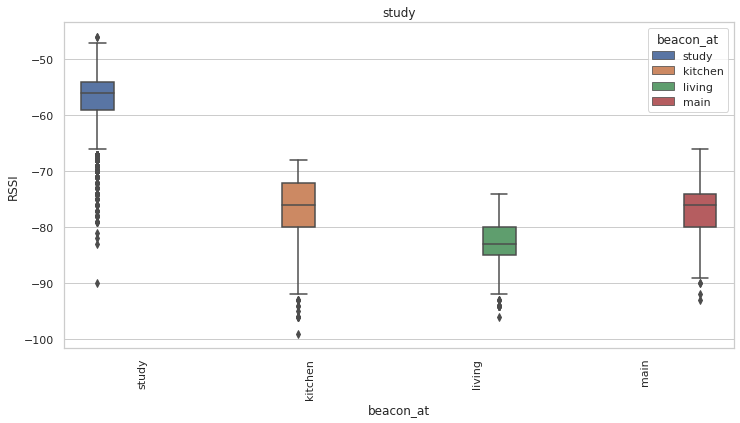

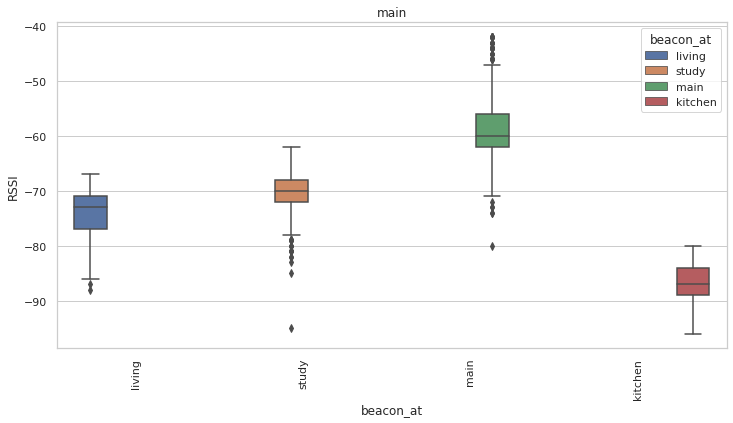

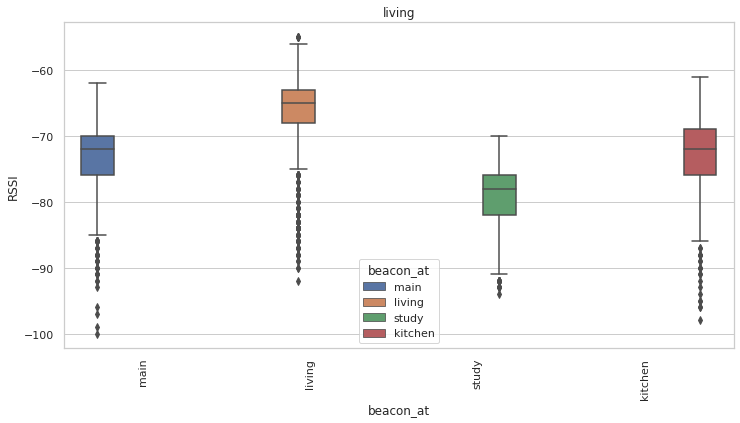

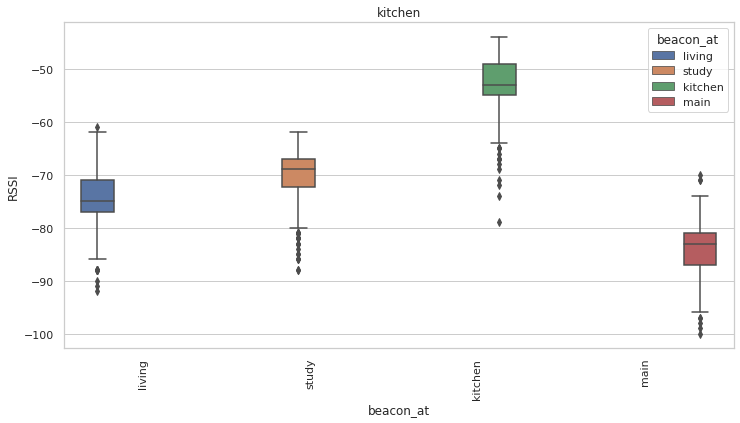

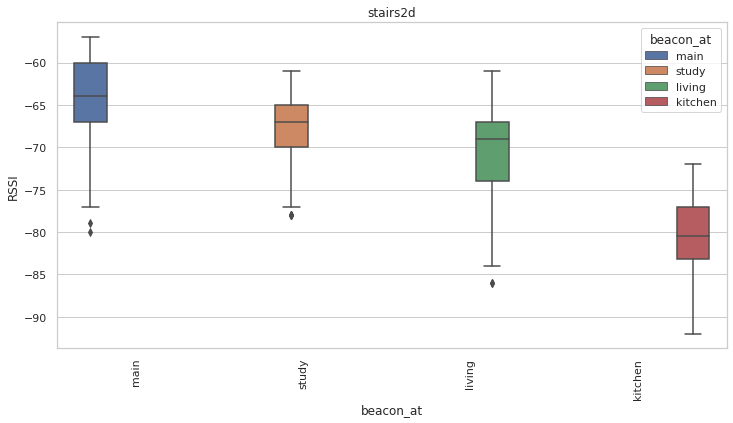

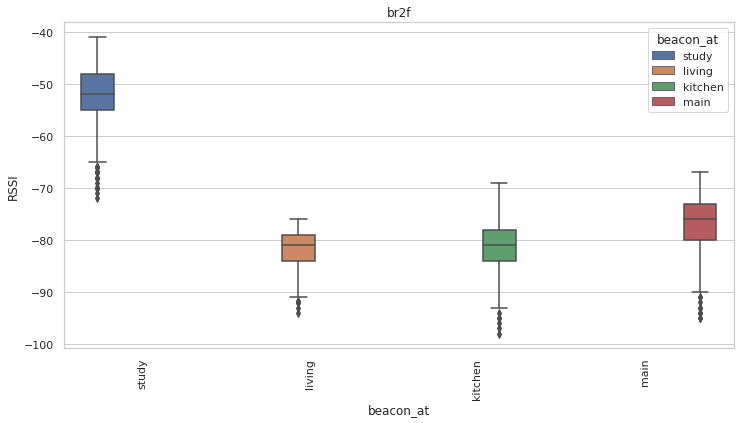

In [ ]:
for area in testDF['user_at'].unique().tolist():
  plt.figure(figsize=(12, 6))
  sns.set(style='whitegrid')
  tmp = testDF[testDF['user_at']==area]
  chart = sns.boxplot(x='beacon_at', y='RSSI', hue='beacon_at', data=tmp)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
  plt.title(area)
  plt.show()

**Let's plot some experiments:**

Each sample was taken for more than 30 seconds.

In [ ]:
def plotSignals(df):
  user_at=df['user_at'].unique()
  plt.figure(figsize=(16, 7))
  sns.lineplot(data=df, x='Timestamp2', y='RSSI', hue='beacon_at').set(title='user at: ' + user_at)

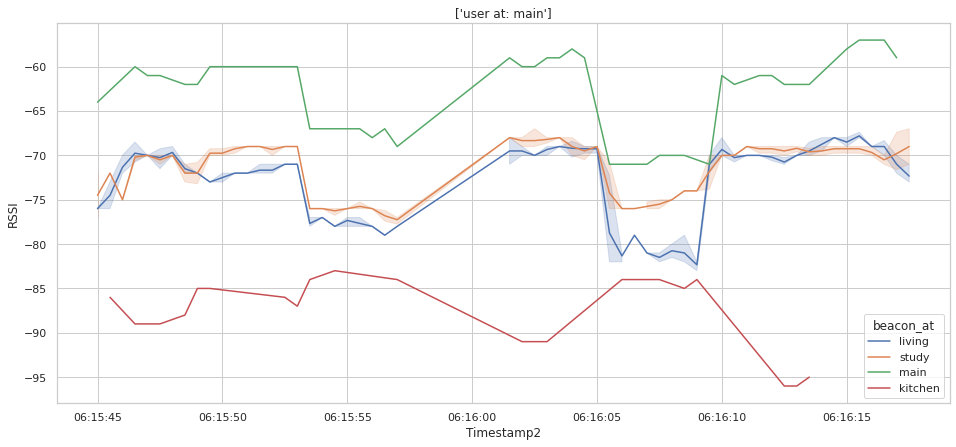

In [ ]:
tmp = testDF[testDF['file_id']==2]
plotSignals(tmp)

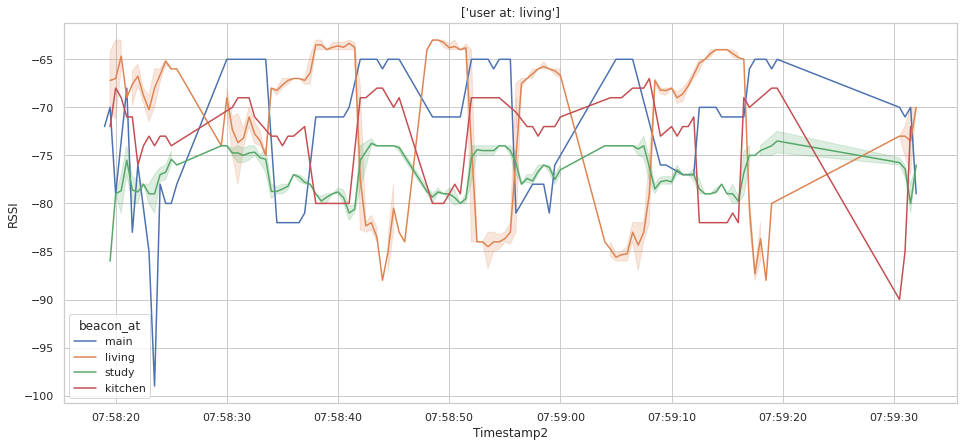

In [ ]:
tmp = testDF[testDF['file_id']==3]
plotSignals(tmp)

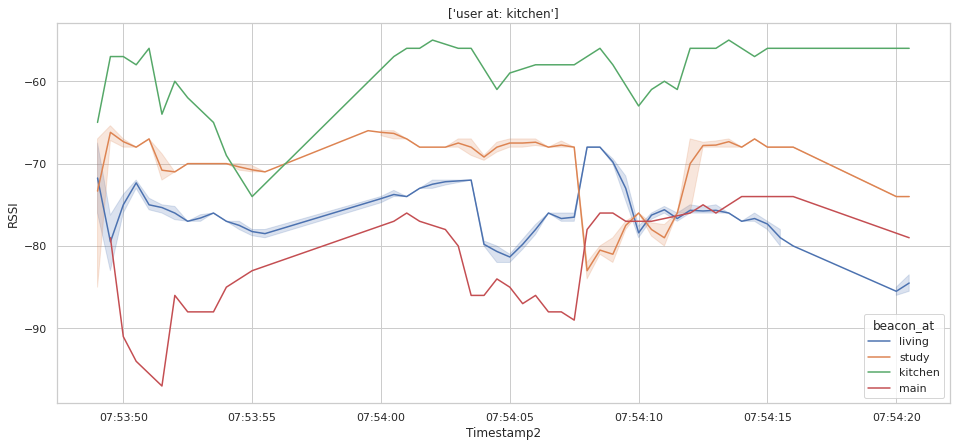

In [ ]:
tmp = testDF[testDF['file_id']==4]
plotSignals(tmp)

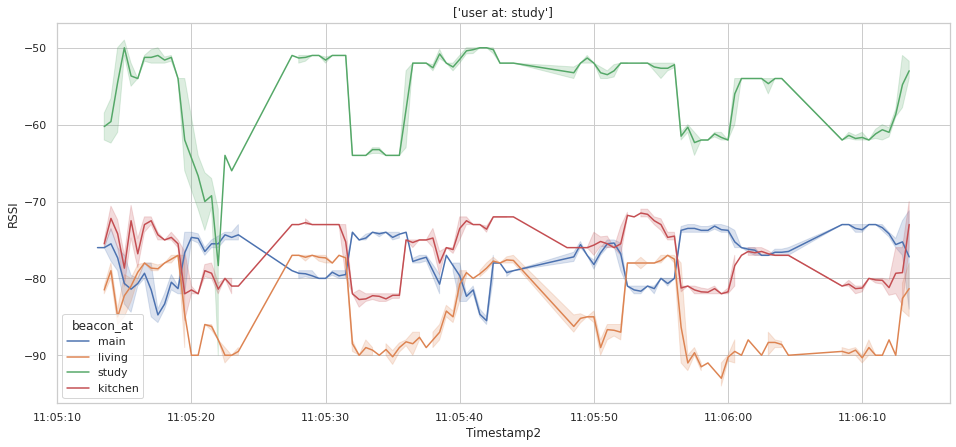

In [ ]:
tmp = testDF[testDF['file_id']==20]
plotSignals(tmp)

As we can see in most of these random experiments, there is a beacon that is more powerful than others and thus we could be able to predict the location of the user.

# Exporting file into drive

In [ ]:
testDF.to_csv( "/content/drive/MyDrive/Research/IBM Advanced Data Science/test_DF.csv", index=False, encoding='utf-8-sig')